<a href="https://colab.research.google.com/github/NguyenSLam/Artificial-Intelligence/blob/main/10VietnameseDishes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [32]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU

In [33]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Dishes_Data/Train/'
photos, labels = list(), list()
for file in listdir(folder):
  output= 0.0
  if file.startswith('banh_bo'):
    output= 1.0
  if file.startswith('banh_bot_loc'):
    output= 2.0
  if file.startswith('banh_trung_thu'):
    output= 3.0
  if file.startswith('banh_cong'):
    output= 4.0
  if file.startswith('banh_da_lon'):
    output= 5.0
  if file.startswith('banh_khot'):
    output= 6.0
  if file.startswith('banh_tai_heo'):
    output= 7.0 
  if file.startswith('banh_mi'):
    output= 8.0
  if file.startswith('banh_tieu'):
    output= 9.0  
  if file.startswith('banh_xeo'):
    output= 10.0                 
  photo = load_img(folder + file, target_size= (200,200))
  photo= img_to_array(photo)
  photos.append(photo)
  labels.append(output)
photos= asarray(photos)
labels= asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/10VietnameseDishes_photos', photos)
save('/content/drive/MyDrive/Colab Notebooks/AI/Backup_AI/10VietnameseDishes_labels', labels)

(2865, 200, 200, 3) (2865,)


In [34]:
#chia 10% dữ liệu cho tập kiểm tra và 90% còn lại cho tập huấn luyện.
split_index = int(0.1 * len(photos))
test_x, test_y = photos[:split_index], labels[:split_index]
train_x, train_y = photos[split_index:], labels[split_index:]
print(train_x.shape, test_x.shape)

(2579, 200, 200, 3) (286, 200, 200, 3)


In [35]:
#về khoảng giá trị từ 0 đến 1 bằng cách chia tất cả các giá trị pixel cho 255
train_x = train_x.reshape((2579, 200, 200, 3))
train_x = train_x.astype('float32')/255

test_x = test_x.reshape((286, 200, 200, 3))
test_x = test_x.astype('float32')/255

In [36]:
from keras.utils import to_categorical
train_y = to_categorical(train_y,11)
test_y = to_categorical(test_y,11)

In [37]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)
     

(2579, 200, 200, 3)
(286, 200, 200, 3)
(2579, 11)
(286, 11)


In [39]:
# khai báo các thành phần cần thiết để xây dựng một mô hình mạng neural 
from keras.models import Sequential,Model
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,Normalization,Input
from keras.optimizers import Adam,SGD  
from keras import losses
loss = losses
batch_size = 64
epochs = 40
classes = 11

In [40]:
# khởi tạo một mô hình mạng neural convolutional (CNN) 
from keras.layers import LeakyReLU
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation = 'linear', input_shape = (200, 200, 3), padding= 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(Conv2D(64, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(128, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(256, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(512, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

model.add(MaxPooling2D((2,2), padding = 'same'))
model.add(Conv2D(1024, (3,3), activation = 'linear', padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))

In [41]:
#Đưa vào ANN, bộ ANN để phân loại:
from keras.losses import categorical_crossentropy
model.add(Flatten())
model.add(Dense(1024, activation = 'linear'))

model.add(Dense(classes, activation = 'softmax'))
model.summary()
     

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 200, 200, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 100, 100, 64)      0         
                                                      

In [42]:
#Compile:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
train = model.fit(train_x, train_y, batch_size= batch_size, epochs= epochs, verbose= 1)
#Đoạn code này đánh giá độ chính xác của mô hình
test_loss, test_acc = model.evaluate(train_x, train_y)
print('Mất mát:',test_loss)
print('Độ chính xác',test_acc)

Epoch 1/40
41/41 [==============================] - 17s 214ms/step - loss: 4.4449 - accuracy: 0.1210
Epoch 2/40
41/41 [==============================] - 7s 173ms/step - loss: 2.2296 - accuracy: 0.1772
Epoch 3/40
41/41 [==============================] - 7s 173ms/step - loss: 2.0728 - accuracy: 0.2598
Epoch 4/40
41/41 [==============================] - 7s 177ms/step - loss: 2.1254 - accuracy: 0.2404
Epoch 5/40
41/41 [==============================] - 7s 177ms/step - loss: 2.1574 - accuracy: 0.2241
Epoch 6/40
41/41 [==============================] - 7s 178ms/step - loss: 2.0247 - accuracy: 0.2800
Epoch 7/40
41/41 [==============================] - 7s 174ms/step - loss: 1.8531 - accuracy: 0.3366
Epoch 8/40
41/41 [==============================] - 7s 175ms/step - loss: 1.7132 - accuracy: 0.3874
Epoch 9/40
41/41 [==============================] - 7s 173ms/step - loss: 1.6778 - accuracy: 0.4102
Epoch 10/40
41/41 [==============================] - 7s 174ms/step - loss: 1.6067 - accuracy: 0.444

In [43]:
model.save('/content/drive/MyDrive/Colab Notebooks/Data/10VietnameseDishes.h5')

1/1 [==============================] - 0s 27ms/step
3
Label:  banh_tieu


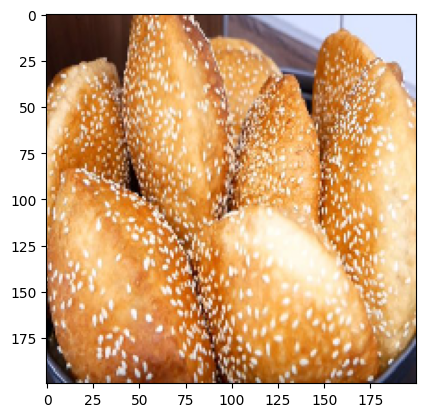

In [46]:
from keras.utils import load_img, img_to_array
img = load_img("/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/banh_tieu14.jpg", target_size=(200,200))
plt.imshow(img)
import numpy as np
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255

matrix= np.argmax(model.predict(img), axis = -1)

classes = ["","banh_bo","banh_da_lon","banh_tieu","banh_cong","banh_bot_loc","banh_khot","banh_trung_thu","banh_mi","banh_tai_heo","banh_xeo"]
temp = matrix[0]
print(temp)
print("Label: ", classes[temp])

1/1 [==============================] - 0s 20ms/step
banh_bo


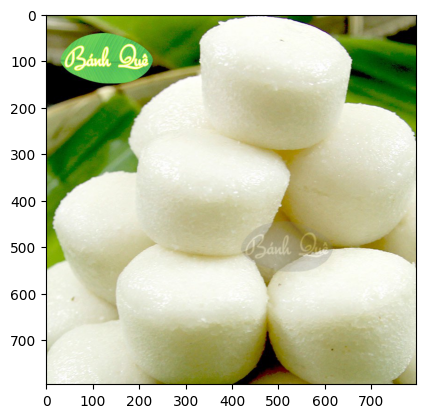

1/1 [==============================] - 0s 19ms/step
banh_da_lon


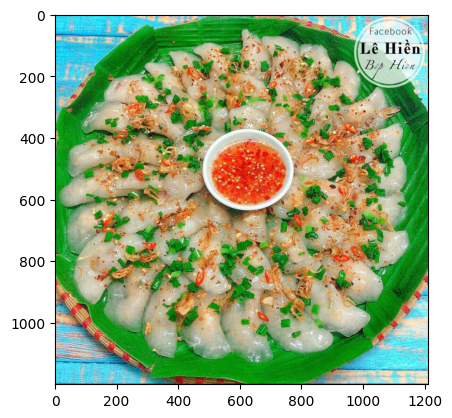

1/1 [==============================] - 0s 21ms/step
banh_cong


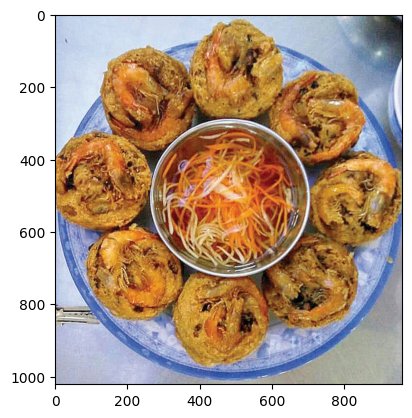

1/1 [==============================] - 0s 19ms/step
banh_bot_loc


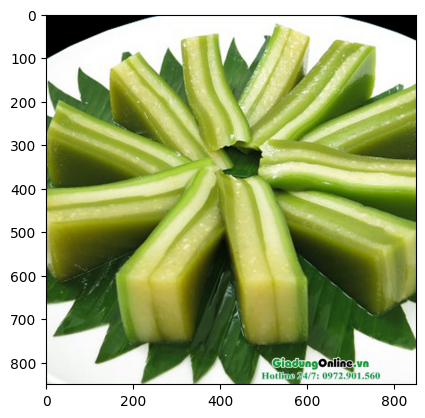

1/1 [==============================] - 0s 21ms/step
banh_khot


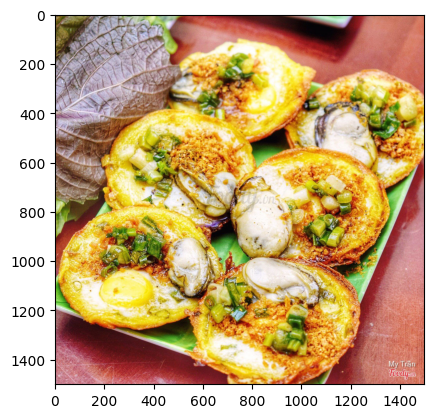

1/1 [==============================] - 0s 21ms/step



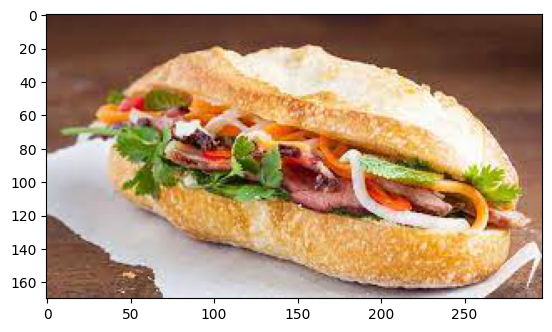

1/1 [==============================] - 0s 21ms/step
banh_trung_thu


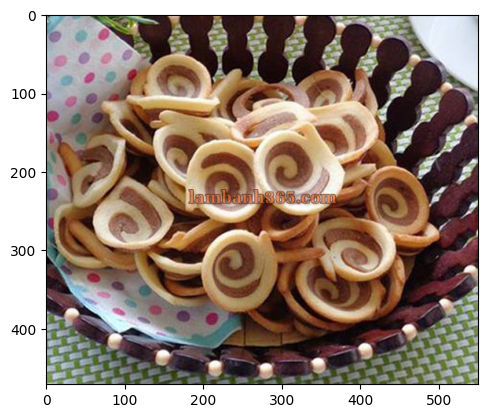

1/1 [==============================] - 0s 44ms/step
banh_tieu


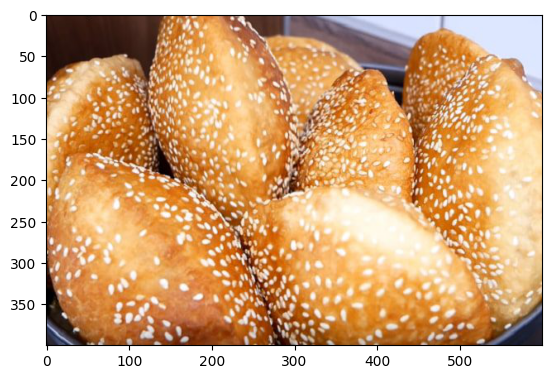

1/1 [==============================] - 0s 61ms/step
banh_tieu


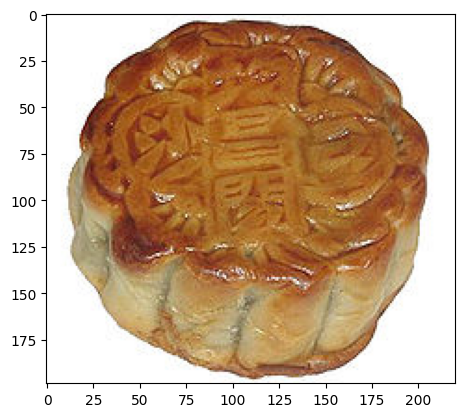

1/1 [==============================] - 0s 22ms/step
banh_xeo


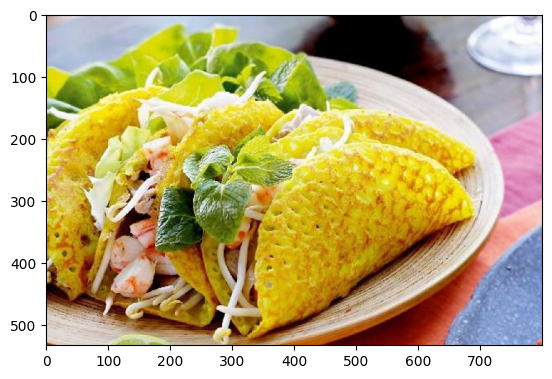

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from os import listdir
from keras.utils import load_img
from keras.utils.image_utils import img_to_array
folder = '/content/drive/MyDrive/AI_Picture/Dishes_Data/Test/'
for file in listdir(folder):
  photo = load_img(folder  + file)
  plt.imshow(photo)
  
  photo = load_img(folder + file, target_size = (200, 200))
  photo=img_to_array(photo)
  #photo = photo.reshape(1,50,50,3)
  photo=photo.astype('float32')
  photo=photo/255
  photo=np.expand_dims(photo,axis=0)
  result=(model.predict(photo).argmax())
  class_name=['','banh_bo','banh_da_lon','banh_tieu','banh_cong','banh_bot_loc','banh_khot','banh_trung_thu','banh_mi','banh_tai_heo','banh_xeo']
  print(class_name[result])
  plt.show()